# 🌿💡 Agri-Analytics: Forecasting Yields from Soil to Sun 🌞💧

## Problem Statement  
The problem at hand is predicting the **crop yield (kg per hectare)** based on various factors, such as:  
- 🌱 **Soil quality**  
- 🌾 **Seed variety**  
- 🧪 **Fertilizer usage**  
- 🌞 **Weather conditions** (sunny days and rainfall)  
- 💧 **Irrigation practices**  

The goal is to understand how each feature influences the crop yield and make accurate predictions based on these features.  

---

## Objective of *Prediction**:  
   - 🎯 The primary objective is to predict the **crop yield (kg per hectare)** based on i  **Optimization**:  
   - 🔧 By analyzing the impact of factors like soil quality, fertilizer usage, and irrigation schedules, the model aims to help **optimize farming practices** f **Decision Support**:  
   - 🧠 Provide insights to farmers and agricultural planners on how to adjust factors such as fertilizer amounts or irrigation schedules based on **expected weather conditions  **Resource Allocation**:  
   - 📊 Help farmers plan their resources effectively by predicting yields under varying conditions. For example:  
     - How much **water** or **fertilizer** to use.  
     - When to apply these resources for maximum yield.  

---

## Dataset Columns Description 🌾📋  

| **Column Name**                          | **Description**                                                                                     |  
|------------------------------------------|-----------------------------------------------------------------------------------------------------|  
| 🌱 **Soil_Quality**                       | Represents the quality of soil, measured on a scale (e.g., nutrient content, pH levels).             |  
| 🌾 **Seed_Variety**                       | Indicates the type of seed used (e.g., 1 for hybrid, 0 for non-hybrid).                              |  
| 🧪 **Fertilizer_Amount_kg_per_hectare**  | Quantity of fertilizer applied per hectare (in kilograms).                                          |  
| 🌞 **Sunny_Days**                         | Total number of sunny days during the crop-growing season.                                          |  
| 🌧️ **Rainfall_mm**                       | Amount of rainfall received (in millimeters) during the crop-growing season.                        |  
| 💧 **Irrigation_Schedule**                | Represents the irrigation frequency/schedule (e.g., number of irrigations during the growing period).|  
| 🎯 **Yield_kg_per_hectare**               | The target variable: Crop yield per hectare (in kilograms).                                         |  

---  

This project aims to combine **agriculture and data science** to support smarter, data-driven decisions in farming! 🌿📈  


# 🌟 *1. Data Loading and Preprocessing* 🚀  

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### 2. Reading the CSV file into a Pandas DataFrame 📂➡️📊

In [5]:
data=pd.read_csv('agricultural_yield_train.csv')

#### 3. Checking the first few rows to understand the structure of the data 🧐🔍:

In [7]:
data.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,96.415657,1,147.853040,94.593926,444.267569,3,683.759119
1,92.352626,0,281.565396,90.504644,517.585491,7,678.714861
2,63.714785,1,137.864940,97.329340,420.310945,8,934.691975
3,90.084256,1,100.946659,113.404828,547.817646,7,905.842541
4,81.600341,1,223.088908,83.048176,434.726333,6,897.584665


####  4. Getting an Overview of the Dataset 📊🔍

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Soil_Quality                      16000 non-null  float64
 1   Seed_Variety                      16000 non-null  int64  
 2   Fertilizer_Amount_kg_per_hectare  16000 non-null  float64
 3   Sunny_Days                        16000 non-null  float64
 4   Rainfall_mm                       16000 non-null  float64
 5   Irrigation_Schedule               16000 non-null  int64  
 6   Yield_kg_per_hectare              16000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 875.1 KB


In [10]:
data.dtypes

Soil_Quality                        float64
Seed_Variety                          int64
Fertilizer_Amount_kg_per_hectare    float64
Sunny_Days                          float64
Rainfall_mm                         float64
Irrigation_Schedule                   int64
Yield_kg_per_hectare                float64
dtype: object

#### 5. Checking the shape of the dataset 📏🔍

In [12]:
Rows,Columns=data.shape
print(f'Rows:{Rows} \n Columns:{Columns}')

Rows:16000 
 Columns:7


#### 6. Checking Missing Values 🔍❓➡️

In [14]:
data.isnull().sum()

Soil_Quality                        0
Seed_Variety                        0
Fertilizer_Amount_kg_per_hectare    0
Sunny_Days                          0
Rainfall_mm                         0
Irrigation_Schedule                 0
Yield_kg_per_hectare                0
dtype: int64

#### 7. 🔍✨ Checking for Duplicates

In [16]:
data.duplicated().sum()

0

#### 8. 📊🔗 Checking Correlation Between Columns 

In [18]:
data.corr()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
Soil_Quality,1.000000,-0.002753,-0.002465,-0.005767,0.008374,0.006665,0.109346
Seed_Variety,-0.002753,1.000000,-0.010290,-0.003105,-0.000875,0.007099,0.680197
Fertilizer_Amount_kg_per_hectare,-0.002465,-0.010290,1.000000,0.001714,0.005886,0.010048,0.284841
Sunny_Days,-0.005767,-0.003105,0.001714,1.000000,-0.006676,0.002904,0.099349
Rainfall_mm,0.008374,-0.000875,0.005886,-0.006676,1.000000,-0.006128,-0.252165
Irrigation_Schedule,0.006665,0.007099,0.010048,0.002904,-0.006128,1.000000,0.561456
Yield_kg_per_hectare,0.109346,0.680197,0.284841,0.099349,-0.252165,0.561456,1.000000


This matrix appears to be a **correlation matrix** showing the relationship between various numerical variables in your dataset. The values represent Pearson correlation coefficients, which range from -1 to 1. Here's how to interpret each of these relationships:

### 1. **Soil Quality and Other Variables**:
   - **Soil_Quality and Seed_Variety**: Correlation of **-0.002753**. This is a very weak negative correlation, indicating that soil quality doesn't have much influence on seed variety.
   - **Soil_Quality and Fertilizer Amount**: Correlation of **-0.002465**. This is also a very weak negative correlation, suggesting no significant relationship between soil quality and fertilizer amount.
   - **Soil_Quality and Sunny Days**: Correlation of **-0.005767**. This shows an almost negligible negative correlation, implying no significant relationship between soil quality and sunny days.
   - **Soil_Quality and Rainfall**: Correlation of **0.008374**. This is a very weak positive correlation, indicating no major link between soil quality and rainfall.
   - **Soil_Quality and Irrigation Schedule**: Correlation of **0.006665**. Again, this is a very weak positive correlation, suggesting no meaningful association between soil quality and irrigation schedule.
   - **Soil_Quality and Yield**: Correlation of **0.109346**. This shows a weak positive correlation, meaning that soil quality may have a slight influence on the yield, though it is not very strong.

### 2. **Seed Variety and Other Variables**:
   - **Seed_Variety and Fertilizer Amount**: Correlation of **-0.010290**. This shows a very weak negative correlation, meaning there is almost no relationship between seed variety and fertilizer amount.
   - **Seed_Variety and Sunny Days**: Correlation of **-0.003105**. This is an extremely weak negative correlation, showing little to no relationship between seed variety and sunny days.
   - **Seed_Variety and Rainfall**: Correlation of **-0.000875**. This is a negligible negative correlation, suggesting almost no relationship between seed variety and rainfall.
   - **Seed_Variety and Irrigation Schedule**: Correlation of **0.007099**. This is a very weak positive correlation, indicating little influence of seed variety on the irrigation schedule.
   - **Seed_Variety and Yield**: Correlation of **0.680197**. This is a moderate positive correlation, suggesting that seed variety has a strong positive impact on the yield, meaning certain seed varieties may contribute significantly to higher yields.

### 3. **Fertilizer Amount and Other Variables**:
   - **Fertilizer_Amount_kg_per_hectare and Sunny Days**: Correlation of **0.001714**. This shows an almost negligible positive correlation, meaning fertilizer amount doesn't really affect sunny days.
   - **Fertilizer_Amount_kg_per_hectare and Rainfall**: Correlation of **0.005886**. Again, this is a very weak positive correlation, implying no significant link between fertilizer amount and rainfall.
   - **Fertilizer_Amount_kg_per_hectare and Irrigation Schedule**: Correlation of **0.010048**. A very weak positive correlation, showing no meaningful relationship between fertilizer and irrigation schedules.
   - **Fertilizer_Amount_kg_per_hectare and Yield**: Correlation of **0.284841**. This shows a moderate positive correlation, suggesting that fertilizer amount has a moderate positive effect on yield, though the relationship is not very strong.

### 4. **Sunny Days and Other Variables**:
   - **Sunny_Days and Rainfall**: Correlation of **-0.006676**. This is a very weak negative correlation, implying no significant relationship between sunny days and rainfall.
   - **Sunny_Days and Irrigation Schedule**: Correlation of **0.002904**. This is a very weak positive correlation, suggesting little to no relationship between sunny days and the irrigation schedule.
   - **Sunny_Days and Yield**: Correlation of **0.099349**. This shows a very weak positive correlation, indicating that sunny days have a minimal effect on yield.

### 5. **Rainfall and Other Variables**:
   - **Rainfall_mm and Irrigation Schedule**: Correlation of **-0.006128**. This is a very weak negative correlation, indicating no significant relationship between rainfall and irrigation schedules.
   - **Rainfall_mm and Yield**: Correlation of **-0.252165**. This is a moderate negative correlation, suggesting that higher rainfall might negatively affect yield (possibly due to waterlogging, excessive moisture, etc.), though the relationship is not extremely strong.

### 6. **Irrigation Schedule and Yield**:
   - **Irrigation_Schedule and Yield**: Correlation of **0.561456**. This is a moderate positive correlation, suggesting that the irrigation schedule has a positive impact on yield, meaning that better-irrigated crops tend to yield more.

### Summary of Key Insights:
- **Seed Variety** has a moderate positive relationship with **Yield**, making it a significant factor in determining yield.
- **Irrigation Schedule** also has a moderate positive relationship with **Yield**, suggesting that better irrigation can improve yield.
- **Rainfall** has a slight negative relationship with yield, indicating that excessive rainfall might negatively impact crop yield.
- Other variables such as **Soil Quality**, **Sunny Days**, and **Fertilizer Amount** show weak or negligible correlations with yield, though soil quality and fertilizer amount show a slight positive correlation with yield.

This analysis can guide you in understanding which factors are more closely associated with higher yields, and can help focus efforts on improving seed variety, irrigation scheduling, and understanding rainfall patterns.

# 🔍 *2. Univariate Analysis* 📊

In [21]:
data.describe(include='all').fillna('-')

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,74.759340,0.702000,175.179275,99.927792,500.527248,5.033313,713.999725
std,14.529295,0.457394,71.971900,9.980610,100.062422,2.229689,202.210914
min,50.007519,0.000000,50.049204,51.478823,109.997455,0.000000,57.514891
25%,62.165317,0.000000,112.434736,93.176143,433.369759,3.000000,577.059891
50%,74.675052,1.000000,175.740993,99.969540,499.955259,5.000000,729.421176
75%,87.376167,1.000000,237.621854,106.685691,567.292539,6.000000,857.442893
max,99.998101,1.000000,299.987645,142.417719,872.349673,15.000000,1385.113600


### 🧾 Interpretation of Feature Distributions  

- 🌱 **Soil_Quality**:  
  - The distribution is **not skewed** and appears to be **evenly distributed**.  

- 🌾 **Seed_Variety**:  
  - The distribution is **left-skewed**, indicating more occurrences of one variety over the other.  

- 🧪 **Fertilizer_Amount_kg_per_hectare**:  
  - The distribution is **evenly spread**, showing no significant skewness.  

- 🌞 **Sunny_Days**:  
  - The values are **evenly distributed** with no skewness.  

- 🌧️ **Rainfall_mm**:  
  - The distribution is **evenly spread** across the dataset.  

- 💧 **Irrigation_Schedule**:  
  - The distribution is **slightly right-skewed**, suggesting a tendency towards fewer irrigation schedules.  

- 🎯 **Yield_kg_per_hectare**:  
  - The distribution is **slightly left-skewed**, indicating slightly higher yields for a majority of cases.  

This analysis provides insights into the underlying data distribution, which is crucial for selecting appropriate models and transformations. 📊🔍  


### Skewness

In [24]:
from scipy.stats import skew
# Check initial skewness
Soil_Quality_before = skew(data['Soil_Quality'])
Seed_Variety_before = skew(data['Seed_Variety'])
Fertilizer_Amount_kg_per_hectare_before = skew(data['Fertilizer_Amount_kg_per_hectare'])
Sunny_Days_before = skew(data['Sunny_Days'])
Rainfall_mm_before = skew(data['Rainfall_mm'])
Irrigation_Schedule_before = skew(data['Irrigation_Schedule'])
Yield_kg_per_hectare_before = skew(data['Yield_kg_per_hectare'])
print(f"Skewness of 'Soil_Quality' before transformation: {Soil_Quality_before}")
print(f"Skewness of 'Seed_Variety_before' before transformation: {Seed_Variety_before}")
print(f"Skewness of 'Fertilizer_Amount_kg_per_hectare_before' before transformation: {Fertilizer_Amount_kg_per_hectare_before}")
print(f"Skewness of 'Sunny_Days_before' before transformation: {Sunny_Days_before}")
print(f"Skewness of 'Rainfall_mm_before' before transformation: {Rainfall_mm_before}")
print(f"Skewness of 'Irrigation_Schedule_before' before transformation: {Irrigation_Schedule_before}")
print(f"Skewness of 'Yield_kg_per_hectare_before' before transformation: {Yield_kg_per_hectare_before}")

Skewness of 'Soil_Quality' before transformation: 0.016374987610891387
Skewness of 'Seed_Variety_before' before transformation: -0.8832927728041255
Skewness of 'Fertilizer_Amount_kg_per_hectare_before' before transformation: -0.011258872590116336
Skewness of 'Sunny_Days_before' before transformation: -0.040411662420439386
Skewness of 'Rainfall_mm_before' before transformation: 0.0035123953638642414
Skewness of 'Irrigation_Schedule_before' before transformation: 0.435426175757498
Skewness of 'Yield_kg_per_hectare_before' before transformation: -0.2036080626193682


- 1. Soil_Quality: 0.0164
    - This skewness is very close to 0, which indicates that the Soil Quality variable is nearly symmetric,
- 2. Seed_Variety_before: -0.8833
    - This indicates a moderate negative skew, meaning the distribution of Seed Variety has a longer left tail.
- 3. Fertilizer_Amount_kg_per_hectare_before: -0.0113
    - This skewness value is close to 0, suggesting that the Fertilizer Amount is nearly symmetric and does not need any transformation.
- 4. Sunny_Days_before: -0.0404
    - The skewness is very close to 0, indicating that Sunny Days is nearly symmetric and does not require transformation.
- 5. Rainfall_mm_before: 0.0035
    - A skewness value close to 0 indicates that Rainfall is also nearly symmetric and does not need transformation.
- 6. Irrigation_Schedule_before: 0.4354
    - This is a moderate positive skew, meaning that Irrigation Schedule has a longer right tail
- 7. Yield_kg_per_hectare_before: -0.2036
    - This shows a slight negative skew, suggesting that Yield is mildly skewed towards lower valu

### 📊 b) Univariate Distribution of Agricultural Features: 🌱

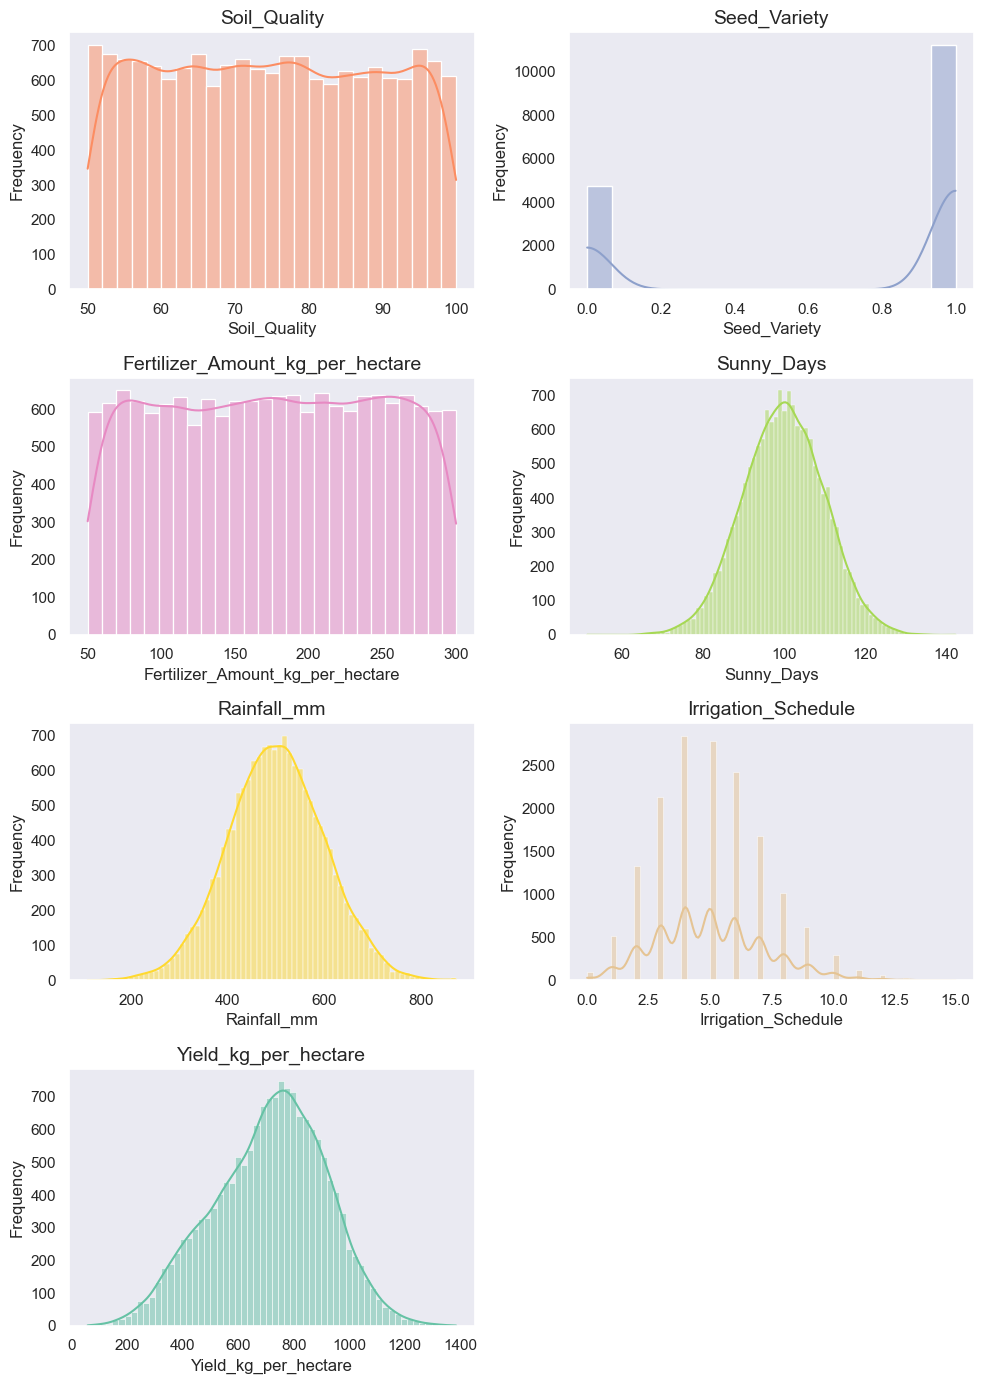

In [70]:
df = pd.DataFrame(data)

# Set a dark theme with dark background and adjust color palette
sns.set_theme(style="dark", palette="dark")

# Create a list of features to visualize
features = [
    "Soil_Quality", 
    "Seed_Variety", 
    "Fertilizer_Amount_kg_per_hectare", 
    "Sunny_Days", 
    "Rainfall_mm", 
    "Irrigation_Schedule", 
    "Yield_kg_per_hectare"
]

# Create subplots for univariate analysis
plt.figure(figsize=(10, 14))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[feature], kde=True, color=sns.color_palette("Set2")[i % len(features)])
    plt.title(f"{feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(False)  # Disable the grid

plt.tight_layout()
plt.show()

- **Interpretation**
- Soil Quality: Even distribution of soil quality 
- Seed Variety: Binary distribution indicating two distinct seed varieties.
- Fertilizer Amount: Uniform spread of fertilizer.
- Sunny Days: Normal distribution with a peak around 100 sunny days.
- Rainfall: Normal distribution peaking at 500 mm.
- Irrigation Schedule: Multiple peaks showing variable irrigation practices.
- Yield: Normal distribution with a peak around 800 kg/ha.

#### 📊 *Box Plot for Distribution of Data (Outliers Included):* 📉

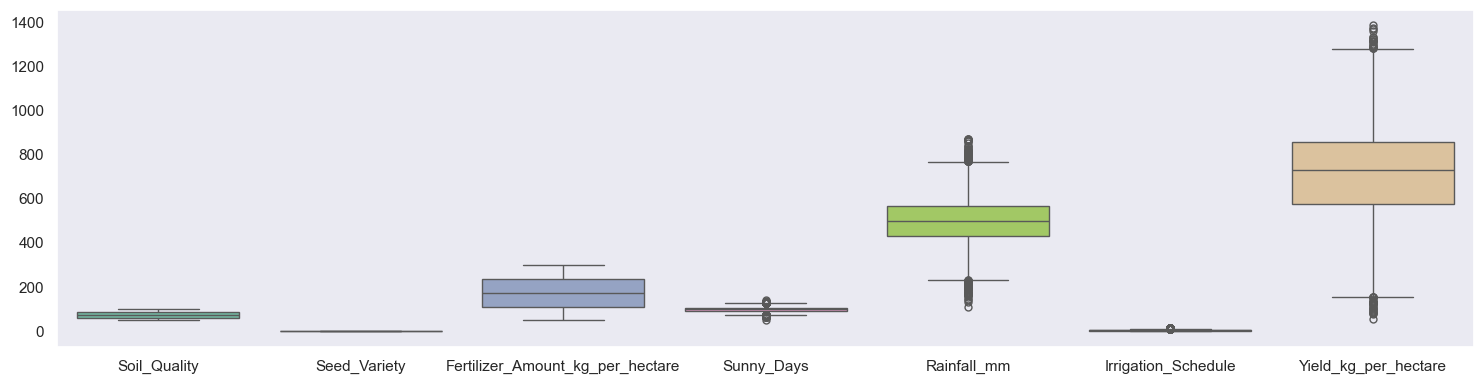

In [72]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=data, palette="Set2", fliersize=5)
plt.tight_layout()
plt.show()

- **Interpretation**
- Soil_Quality: Low variability
- Seed_Variety: No variation
- Fertilizer_Amount_kg_per_hectare: Significant variability
- Sunny_Days: Consistent
- Rainfall_mm: High variability
- Irrigation_Schedule: No variation
- Yield_kg_per_hectare: Significant variability

#### 📊 *a) Violin Plot for Yield by Seed Variety:* 🌱

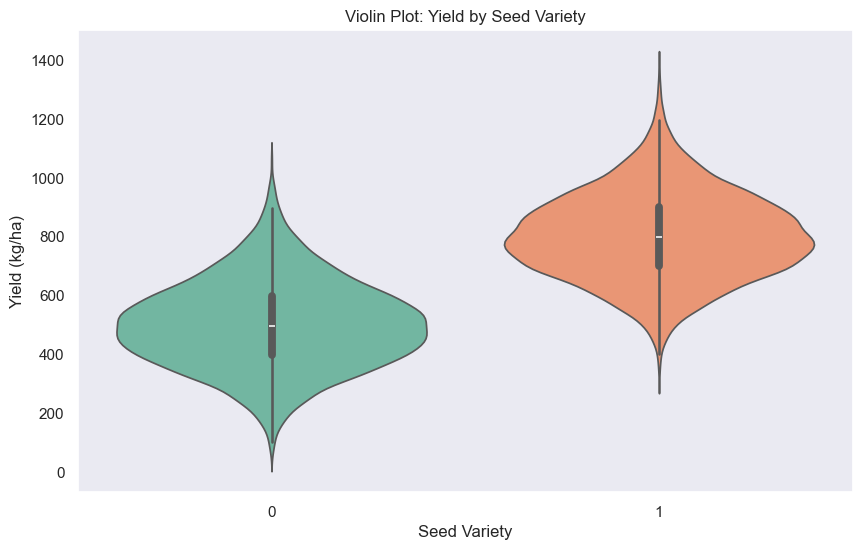

In [115]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Seed_Variety', y='Yield_kg_per_hectare', data=data, palette='Set2')
plt.title('Violin Plot: Yield by Seed Variety')
plt.xlabel('Seed Variety')
plt.ylabel('Yield (kg/ha)')
plt.show()

- **Interpretation**
- The yield distribution for seed variety 1 is wider with a higher median compared to seed variety 0.

#### 📊 *a) Violin Plot for Yield Distribution by Irrigation Schedule:* 💧

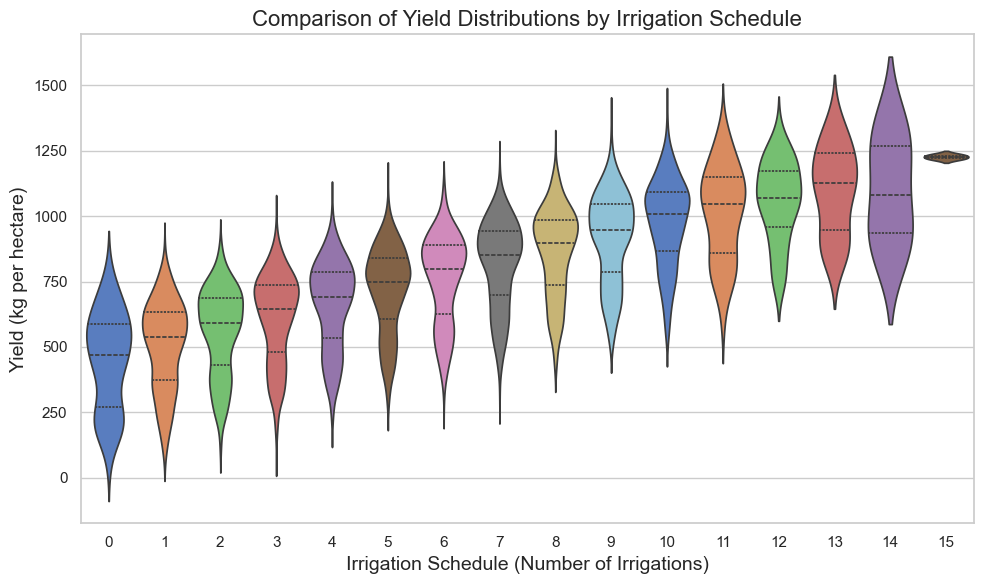

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Irrigation_Schedule', y='Yield_kg_per_hectare', 
               palette='muted', inner='quart', scale='width')

# Set labels and title
plt.title('Comparison of Yield Distributions by Irrigation Schedule', fontsize=16)
plt.xlabel('Irrigation Schedule (Number of Irrigations)', fontsize=14)
plt.ylabel('Yield (kg per hectare)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

- **Interpretation**
- The violin plot shows increasing crop yields with more irrigation events, highlighting variability in distribution.
- It underscores irrigation's significant impact on yields, providing insights for optimizing water usage and agricultural productivity.

#### 📊 *c) Scatter Plot with Regression Line for Fertilizer Amount vs. Yield:* 🌱

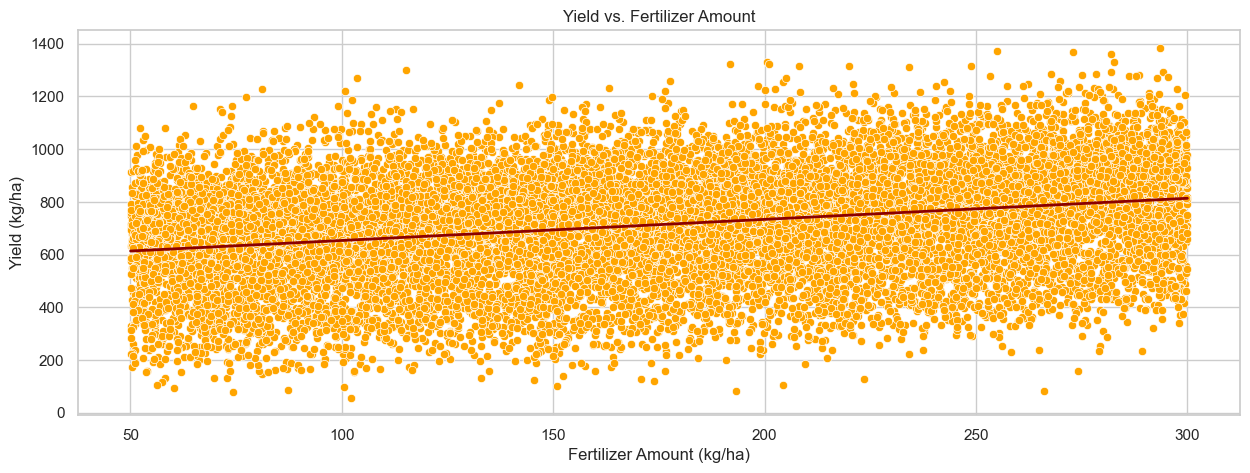

In [34]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Fertilizer_Amount_kg_per_hectare', y='Yield_kg_per_hectare', data=data, color='orange')
sns.regplot(x='Fertilizer_Amount_kg_per_hectare', y='Yield_kg_per_hectare', data=data, scatter=False, color='darkred', line_kws={'linewidth': 2, 'linestyle': '-'})

plt.title('Yield vs. Fertilizer Amount')
plt.xlabel('Fertilizer Amount (kg/ha)')
plt.ylabel('Yield (kg/ha)')
plt.show()

- **Interpretation**
- The scatter plot shows a relationship between fertilizer amount (kg/ha) and crop yield (kg/ha).
- The red regression line indicates a positive correlation; as the fertilizer amount increases, yield tends to increase slightly.

#### 📊 *d) Scatter Plot with Regression Line: Yield vs. Rainfall* 🌧️🌾

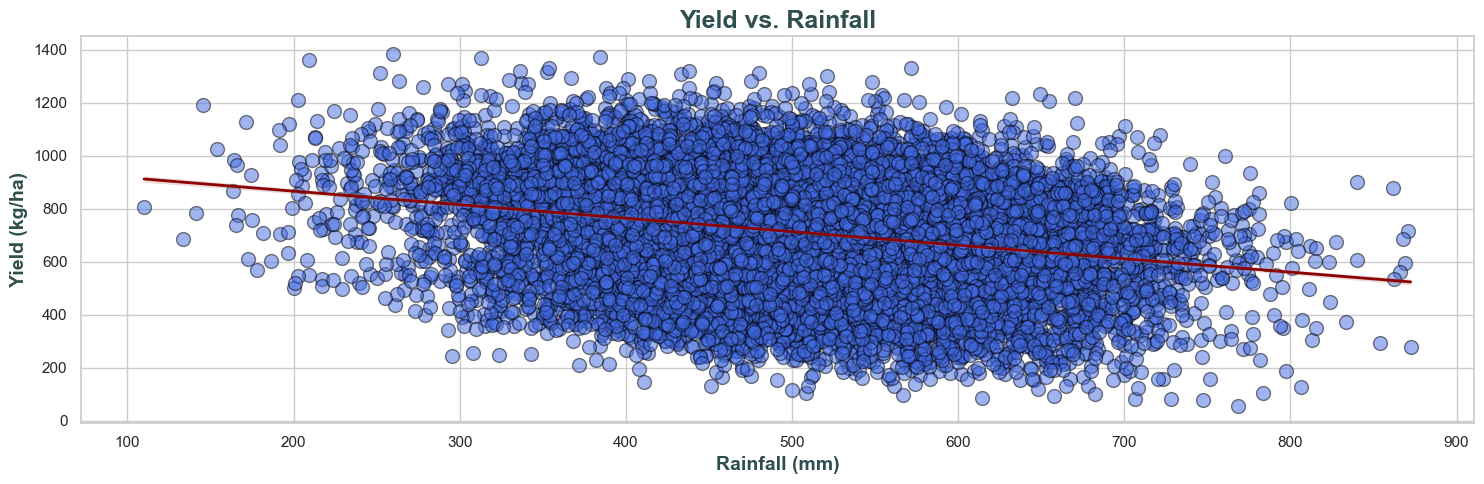

In [35]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Rainfall_mm', y='Yield_kg_per_hectare', data=data, color='royalblue', s=100, edgecolor='black', linewidth=1,alpha=0.5)

sns.regplot(x='Rainfall_mm', y='Yield_kg_per_hectare', data=data, scatter=False, color='darkred', line_kws={'linewidth': 2, 'linestyle': '-'})

plt.title('Yield vs. Rainfall', fontsize=18, fontweight='bold', color='darkslategray')
plt.xlabel('Rainfall (mm)', fontsize=14, fontweight='bold', color='darkslategray')
plt.ylabel('Yield (kg/ha)', fontsize=14, fontweight='bold', color='darkslategray')
plt.tight_layout()
plt.show()

- **Interpretation**
- The scatterplot shows a negative linear relationship between rainfall (in mm) and yield (in kg/ha), as indicated by the downward-sloping red regression line.
- Excessive rainfall might negatively impact yield, possibly due to over-saturation of soil or crop damage.

#### 📊 *d) Correlation Heatmap for Numeric Variables:* 🔍

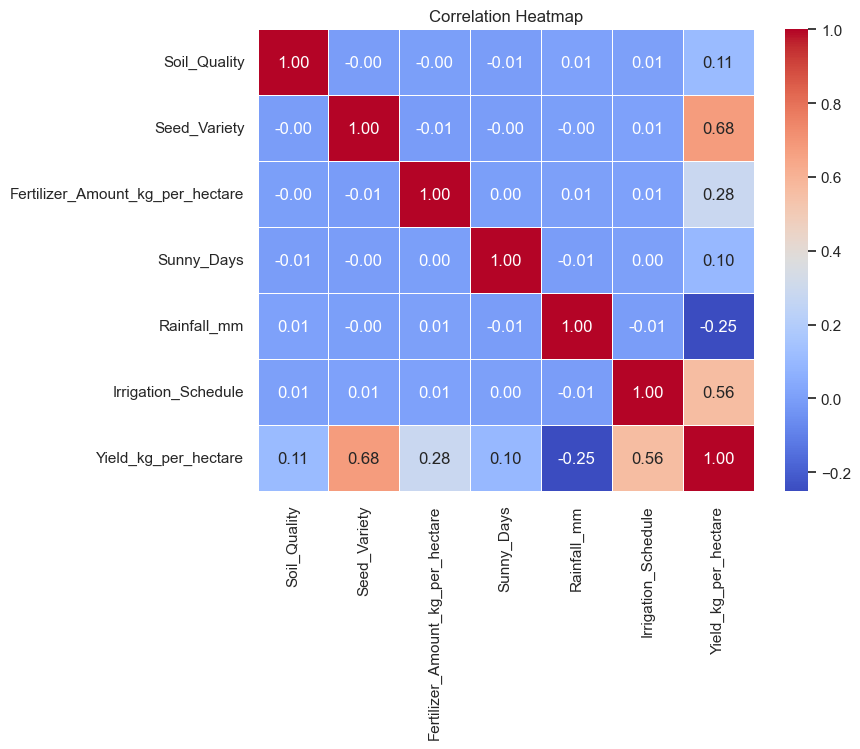

In [30]:
plt.figure(figsize=(8, 6))
correlation = data.corr()
sns.heatmap(
    correlation,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Heatmap')
plt.show()


- **Interpretation**
- Seed Variety has the strongest positive correlation with yield (𝑟=0.68), indicating it is an important factor for yield prediction.
- Irrigation Schedule (𝑟=0.56) and Fertilizer Amount (𝑟=0.28) also positively influence yield.
- Rainfall has a weak negative correlation (𝑟=−0.25), confirming its potential adverse effects at high levels.
- Sunny Days and Soil Quality show negligible correlations (𝑟=0.10 and 𝑟=0.11).

#### 📊 *c) 3D Scatter Plot for Yield vs. Seed Variety & Irrigation Schedule:* 🌱

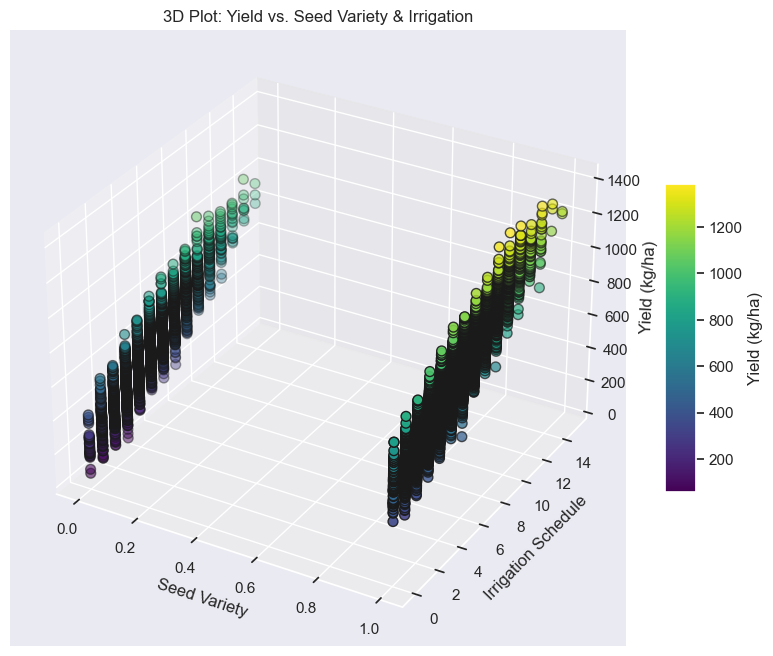

In [74]:
 from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data['Seed_Variety'], data['Irrigation_Schedule'], data['Yield_kg_per_hectare'],
    c=data['Yield_kg_per_hectare'], cmap='viridis', edgecolor='k', s=50
)
ax.set_xlabel("Seed Variety")
ax.set_ylabel("Irrigation Schedule")
ax.set_zlabel("Yield (kg/ha)")
ax.set_title("3D Plot: Yield vs. Seed Variety & Irrigation")
plt.colorbar(scatter, shrink=0.5, aspect=10, label="Yield (kg/ha)")
plt.show()

- **Interpretation**
- Yield increases as both seed variety improves (closer to 1.0) and irrigation frequency increases.
- Seed varieties closer to higher values (e.g., 0.8–1.0) combined with higher irrigation schedules (10–14) result in maximum yields.
- Poor irrigation (e.g., <5) yields minimal output, regardless of seed variety.